This notebook will form the evaluation on which model to select for my PhishGuard tool.
Consider the data that is to be trained I am considering the following models:
- K - Nearest Neighbours (KNN)
- Random Forest Classifier (RFC)
- Gradient Boost Classifier (GBC)
- Support Vector Machines (SVM)
- Logistic Regression

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
import numpy as np
import seaborn as sns



/Users/levi_1/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/levi_1/Library/Python/3

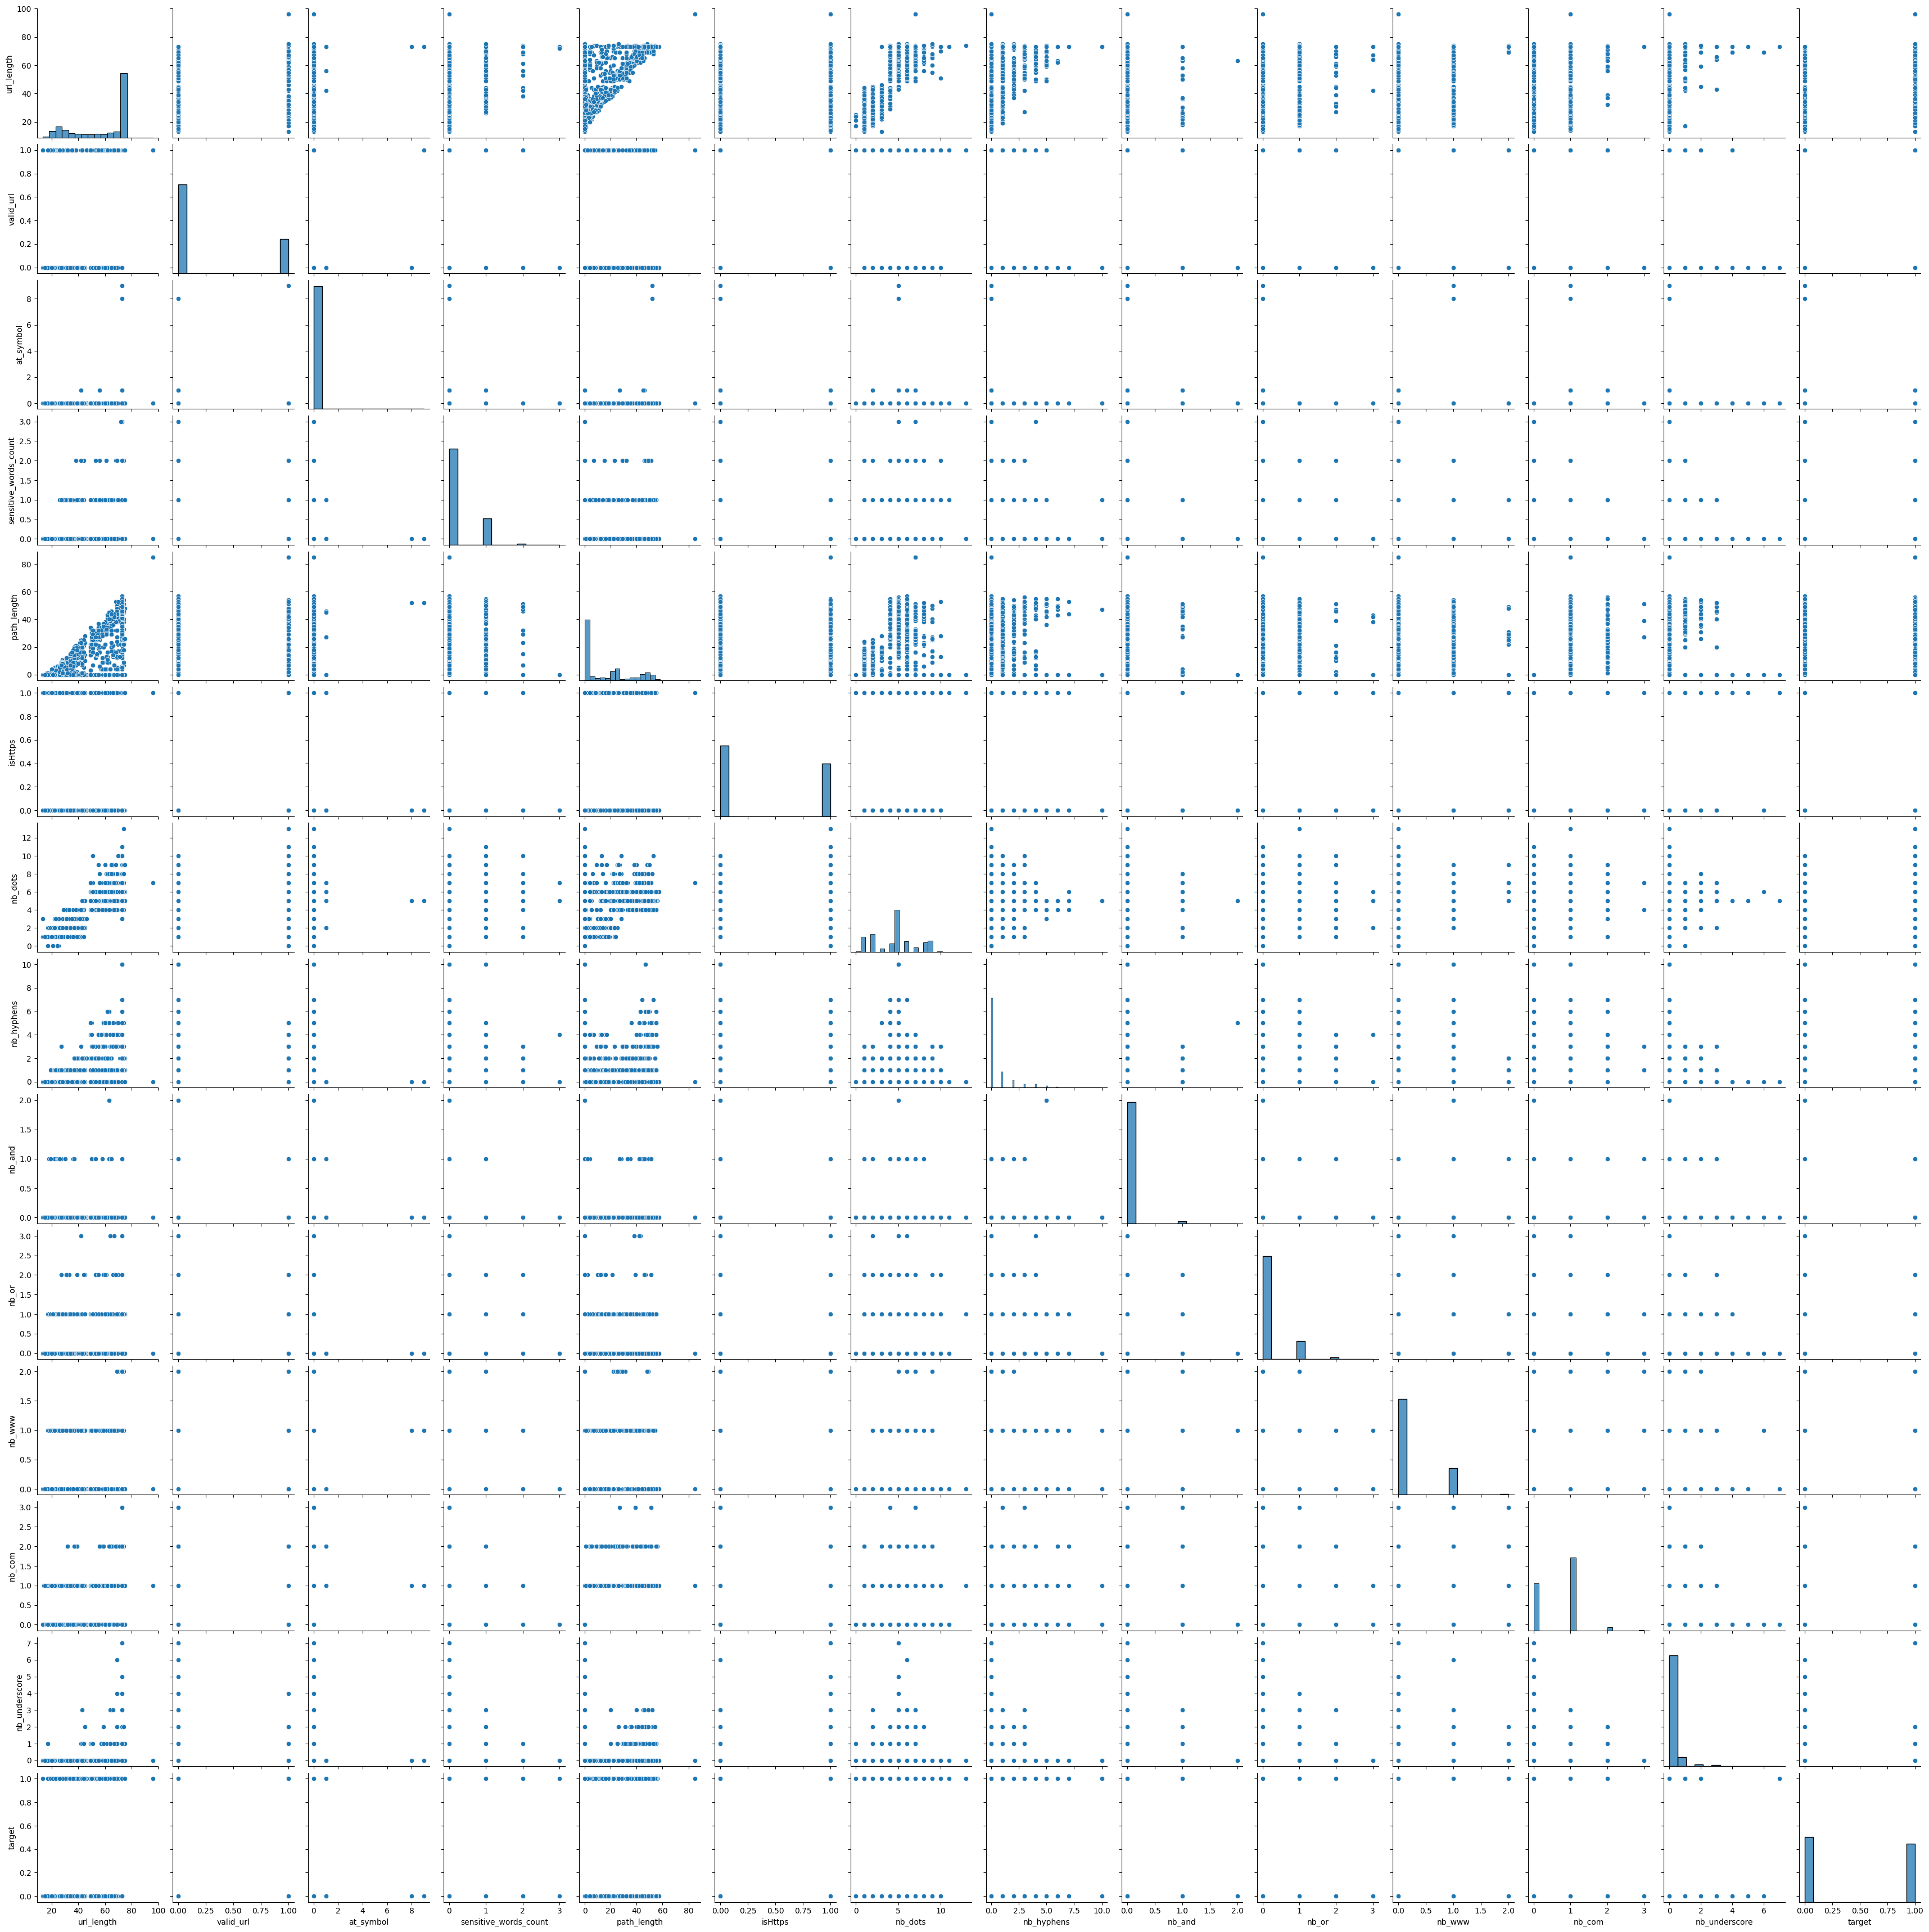

In [40]:
df = shuffle(pd.read_csv("./datasets/phish_guard.csv"))

df.head
df.info

sns.pairplot(df,palette='Dark2')

In [13]:
X = df.drop("target", axis=1)
Y = df["target"]


X.dropna()
Y.dropna()

X.drop_duplicates()
Y.drop_duplicates()

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, shuffle=True)


In [14]:
default_knn = KNeighborsClassifier()
default_knn.fit(X_train,y_train)
y_pred_knn_default  = default_knn.predict(X_test)

In [15]:
estimator = KNeighborsClassifier(algorithm='auto')

parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')
}
grid_search_KNN = GridSearchCV(
    estimator=estimator,
    param_grid=parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 5
)

In [16]:
KNN_1=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN1 =KNN_1.predict(X_test)
KNN_2=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN2 =KNN_2.predict(X_test)
KNN_3=grid_search_KNN.fit(X_train, y_train)
y_pred_KNN3 =KNN_3.predict(X_test)
# We can not display the best parameters for KNN classifier
print(grid_search_KNN.best_params_ ) 
# mean cross validated score of the best estimator
print('Best Score - KNN:', grid_search_KNN.best_score_ )

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Best Score - KNN: 0.8577889447236181


In [17]:
print('Accuracy Score - KNN Default:', metrics.accuracy_score(y_test, y_pred_knn_default))  
print('Accuracy Score - KNN_1:', metrics.accuracy_score(y_test, y_pred_KNN1)) 
print('Accuracy Score - KNN_2:', metrics.accuracy_score(y_test, y_pred_KNN2)) 
print('Accuracy Score - KNN _3: ', metrics.accuracy_score(y_test, y_pred_KNN3)) 

Accuracy Score - KNN Default: 0.8554216867469879
Accuracy Score - KNN_1: 0.891566265060241
Accuracy Score - KNN_2: 0.891566265060241
Accuracy Score - KNN _3:  0.891566265060241


In [18]:
print(KNN_1.best_params_)

{'leaf_size': 1, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}



KNN Evaluation Complete
===

In [27]:
from sklearn.ensemble import RandomForestRegressor

rfr_default = RandomForestRegressor(random_state=42)
print(rfr_default.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [25]:
'''
n_estimators = number of trees in random forest
max_features = number of features consider in each split
max_depth = maximum number of levels within the tree
min_samples_split = samples required at each split node
min_samples_leaf = minimum number if leafs at each node
boostrap = selecting training method at each level
'''
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [34]:
parameters_RFR = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
    }

grid_search_RFR = GridSearchCV(
    estimator=rfr_default,
    param_grid=parameters_RFR,
    scoring='f1',
    n_jobs=-1,
    cv=5,
    )


In [35]:
RFR_1 = grid_search_RFR.fit(X_train, y_train)
y_pred_RFR1 = RFR_1.predict(X_test)
RFR_2 = grid_search_RFR.fit(X_train, y_train)
y_pred_RFR2 = RFR_2.predict(X_test)
RFR_3 = grid_search_RFR.fit(X_train, y_train)
y_pred_RFR3 = KNN_3.predict(X_test)
# We can not display the best parameters for KNN classifier
print(grid_search_RFR.best_params_ ) 
# mean cross validated score of the best estimator
print('Best Score - KNN:', grid_search_RFR.best_score_ )

/Users/levi_1/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/levi_1/Library/Python/3.11/lib/python/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

KeyboardInterrupt: 